<a href="https://colab.research.google.com/github/steping1/cyber-security-project/blob/main/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
'Colab Notebooks'  'Edge-IIoTset dataset'
'Attack traffic'  'Normal traffic'  'Selected dataset for ML and DL'
DNN-EdgeIIoT-dataset.csv  ML-EdgeIIoT-dataset.csv


<ipython-input-1-6e525d07f0ac>:17: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Training set accuracy: 0.87
Test set accuracy: 0.87
Anomalies (Attack_label = 1):
        arp.hw.size  arp.opcode  dns.qry.name  dns.qry.qu  dns.qry.type  \
23552     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
31814     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
105455    -0.100375   -0.094772     -0.080974   -0.033762           0.0   
154614    -0.100375   -0.094772     -0.080974   -0.033762           0.0   
75838     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
...             ...         ...           ...         ...           ...   
32008     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
12537     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
68482     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
47316     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
102327    -0.100375   -0.094772     -0.080974   -0.033762           0.0   

        dns.retra

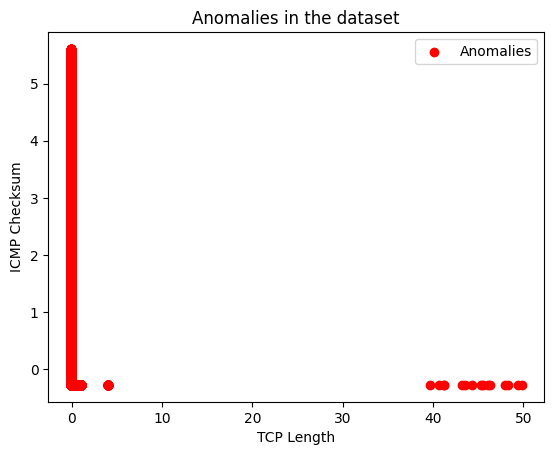

Total number of anomalies: 30509
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      4985
           1       0.87      0.99      0.93     26575

    accuracy                           0.84     31560
   macro avg       0.29      0.33      0.31     31560
weighted avg       0.73      0.84      0.78     31560



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           0       1.00      0.00      0.00      4985
           1       0.87      0.99      0.93     26575

    accuracy                           0.84     31560
   macro avg       0.62      0.66      0.31     31560
weighted avg       0.89      0.84      0.78     31560



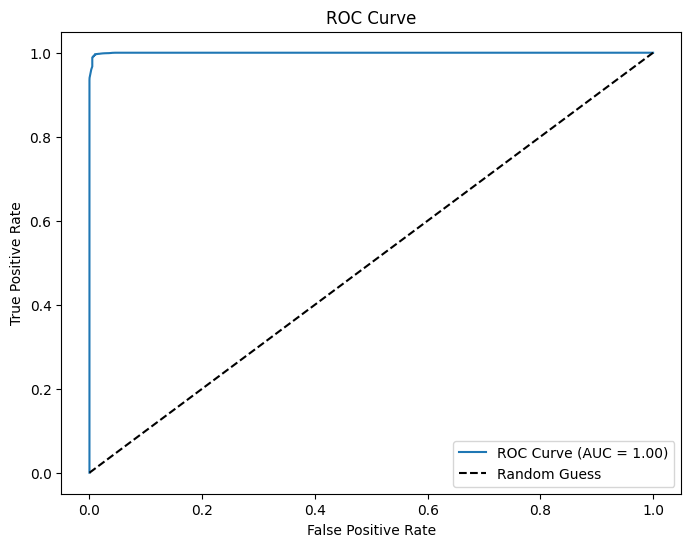

ROC-AUC Score: 1.00
Cross-Validation Accuracy Scores:  [0.98250951 0.99524715 0.98618504 0.99315589 0.99350444]
Mean Accuracy:  0.9901204055766794
Standard Deviation:  0.004906367386336211


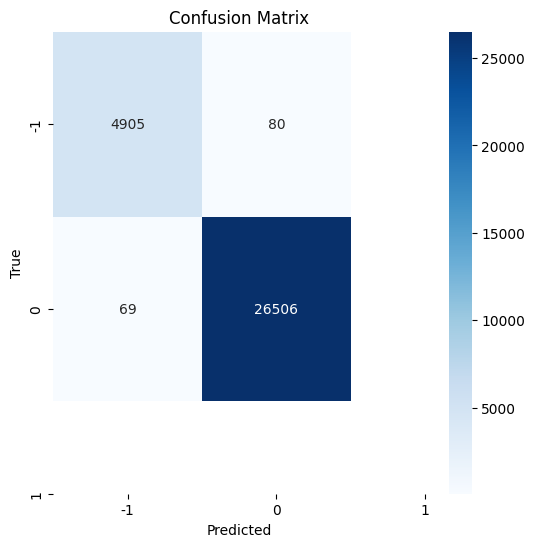

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4985
           1       1.00      1.00      1.00     26575

    accuracy                           1.00     31560
   macro avg       0.99      0.99      0.99     31560
weighted avg       1.00      1.00      1.00     31560

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4985
           1       1.00      1.00      1.00     26575

    accuracy                           1.00     31560
   macro avg       0.99      0.99      0.99     31560
weighted avg       1.00      1.00      1.00     31560

Confusion Matrix:
 [[ 4905    80]
 [   69 26506]]
ROC-AUC Score: 1.00
Number of normal: 4985
Number of anomalies: 26575


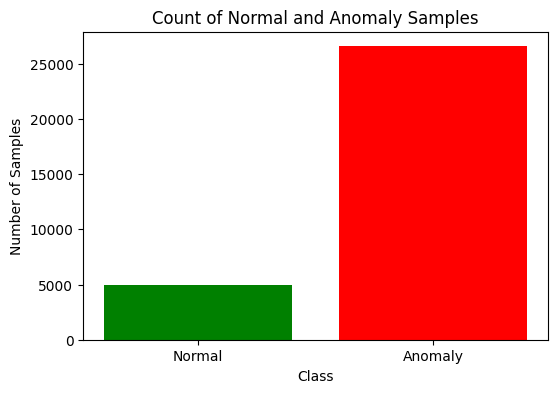

Training time: 11.1732 seconds
Test time: 0.3352 seconds
Accuracy: 0.9953


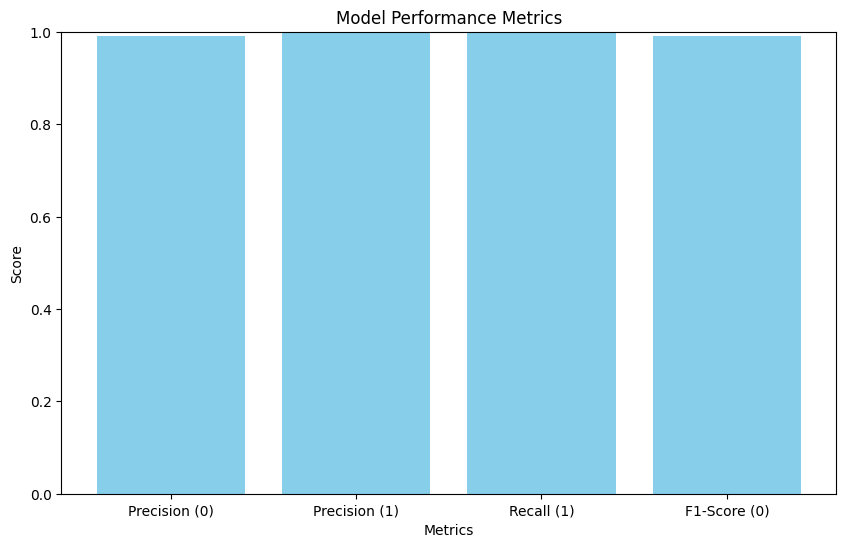

Accuracy: 1.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/My\ Drive

!ls '/content/drive/My Drive/Edge-IIoTset dataset'


!ls '/content/drive/My Drive/Edge-IIoTset dataset/Selected dataset for ML and DL'

import pandas as pd

# Specify file path
file_path = '/content/drive/My Drive/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'

# Load the CSV file
data = pd.read_csv(file_path)

# Examine the dataset
data.head()

# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Show only columns with missing values

# Remove rows with missing values
data_cleaned = data.dropna()  # Drop rows containing missing values

# Or fill missing values with the mean
# data_cleaned = data.fillna(data.mean())  # Fill missing values with the mean

# Check the cleaned data
data_cleaned.head()

from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Exclude Attack_label and Attack_type columns from normalization
numerical_columns = numerical_columns.difference(['Attack_label', 'Attack_type'])

# Apply standard scaler
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Check the normalized data
data_cleaned.head()


from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = data_cleaned[numerical_columns]  # Normalized numerical data
y = data_cleaned['Attack_label']  # Anomaly labels (1 MITM, 0 Normal)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dimensions of training and testing data
X_train.shape, X_test.shape

from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% anomaly rate

# Train the model on training data
model.fit(X_train)

# Predict anomalies in the training data
train_anomalies = model.predict(X_train)

# Predict anomalies in the testing data
test_anomalies = model.predict(X_test)

# Check anomalies
train_anomalies_data = X_train[train_anomalies == -1]  # -1 indicates anomalies
test_anomalies_data = X_test[test_anomalies == -1]  # -1 indicates anomalies

# Display anomalies in training and testing data
train_anomalies_data.head(), test_anomalies_data.head()


from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Train the model on training data
model.fit(X_train)

# Predict on training data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# -1 indicates anomaly, 1 indicates normal
# Transform predictions and add as a new column
y_train_pred = [1 if pred == 1 else 0 for pred in y_train_pred]  # Normal: 1, Anomalies: 0
y_test_pred = [1 if pred == 1 else 0 for pred in y_test_pred]

# Evaluate accuracy on training and testing sets
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training set accuracy: {train_accuracy:.2f}")
print(f"Test set accuracy: {test_accuracy:.2f}")

# Make predictions with the model
y_pred = model.predict(X_test)

# Filter data with anomaly labels (Attack_label = 1)
anomalies = X_test[y_pred == 1]

# Print anomaly data
print("Anomalies (Attack_label = 1):")
print(anomalies)


import matplotlib.pyplot as plt

# Visualize anomalies with specific features
plt.scatter(anomalies['tcp.len'], anomalies['icmp.checksum'], color='red', label='Anomalies')
plt.xlabel('TCP Length')
plt.ylabel('ICMP Checksum')
plt.title('Anomalies in the dataset')
plt.legend()
plt.show()

print(f"Total number of anomalies: {anomalies.shape[0]}")


from sklearn.metrics import classification_report

# Evaluate model performance
print(classification_report(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight={0: 1, 1: 5})
model.fit(X_train, y_train)

from sklearn.metrics import classification_report

# Set zero division parameter to 1
print(classification_report(y_test, y_pred, zero_division=1))


from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute ROC-AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for anomaly class (1)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Visualize ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'ROC-AUC Score: {roc_auc:.2f}')

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model = RandomForestClassifier(class_weight='balanced')

# Apply K-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5: 5-fold cross-validation

# Print results
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Accuracy: ", cv_scores.mean())
print("Standard Deviation: ", cv_scores.std())


# Train the model with training data
model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model with training data
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions with the model
y_pred = model.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred))



# Make predictions with the model (on MITM test data)
y_pred_mitm = model.predict(X_test)

# Compute Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_mitm)

# Compute Precision, Recall, F1-Score, and ROC-AUC scores
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred_mitm))
print("Confusion Matrix:\n", conf_matrix)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


import matplotlib.pyplot as plt

# Retrieve normal and anomaly labels
normal_count = (y_test == 0).sum()  # Number of normal labels (0)
anomaly_count = (y_test == 1).sum()  # Number of anomaly labels (1)

# Print counts
print(f"Number of normal: {normal_count}")
print(f"Number of anomalies: {anomaly_count}")

# Plot the counts
labels = ['Normal', 'Anomaly']
counts = [normal_count, anomaly_count]

# Display bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Count of Normal and Anomaly Samples')
plt.show()



import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset (X = features, y = labels)
# X, y represent your dataset's features and labels
# X = features of your dataset
# y = your labels

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model (e.g., RandomForest)
model = RandomForestClassifier(random_state=42)

# Measure training time
start_train_time = time.time()
model.fit(X_train, y_train)  # Train the model
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Measure test time
start_test_time = time.time()
y_pred = model.predict(X_test)  # Make predictions on test data
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Print results
print(f"Training time: {train_time:.4f} seconds")
print(f"Test time: {test_time:.4f} seconds")

# Evaluate model performance (e.g., accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


import matplotlib.pyplot as plt

# Metrics
metrics = [0.99, 1.00, 1.00, 0.99]
metric_names = ['Precision (0)', 'Precision (1)', 'Recall (1)', 'F1-Score (0)']

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color='skyblue')
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Display accuracy
accuracy = 1.00
print(f"Accuracy: {accuracy}")










ıot dataset datamining project
